In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

from scipy.interpolate import RegularGridInterpolator
import random
import pandas as pd

from astropy.cosmology import WMAP9 as cosmo

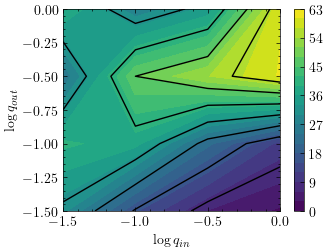

In [2]:
import interpolate as inter

In [3]:
#df = pd.read_csv("data/Triple-mass-redshift.csv")
df = pd.read_csv("data/Triple-mass-merger_time.csv")

In [4]:
df.head()

,Unnamed: 0,M1,qin,qout,t_triple
0,0,2.150737e+07,0.381485,1.775986,1.985633e+09
1,1,1.546540e+08,0.272335,1.592074,5.529691e+09
2,2,1.546540e+08,0.272335,1.592074,3.025313e+09
3,3,1.546540e+08,0.272335,1.592074,1.972738e+09
4,4,9.436961e+06,0.106270,43.596403,4.814316e+09


In [6]:
M1_ill = df["M1"].to_numpy()
qin_ill = df["qin"].to_numpy()
qout_ill = df["qout"].to_numpy()
triple_merger_time = df["t_triple"].to_numpy()

In [7]:
N_triple = len(M1_ill)

In [8]:
def trip_outcome_trial(N):
    
    trial_result = []
    M1_mergers = []
    M2_mergers = []
    M3_mergers = []
    #merger_flags = []
    #z_mergers = []
    t_mergers = []
    
    for i in range(N):
        
        M1_mergers = []
        M2_mergers = []
        M3_mergers = []
        merger_flags = []
        #z_mergers = []
        t_mergers = []
        
        no_merger = 0
        prompt_merger = 0
        ejection_then_merger = 0
        
        N_triples = len(M1_ill)
        
        for j in range(N_triples):
            
            #random number draw
            P = random.uniform(0,1)
    
            a_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"a")*0.01
            b_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"b")*0.01
            c_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"c")*0.01
            d_P = inter.interp_result(M1_ill[j],qin_ill[j],qout_ill[j],"d")*0.01
            
            #masses of the triples
            M1 = M1_ill[j]
            M2 = qin_ill[j] * M1_ill[j]
            M3 = qout_ill[j] * (M1 + M2)
            #z_for_triple = z_ill[j]
            t_t = triple_merger_time[j]
            
    
            #prompt merger
            if(P < a_P+b_P+c_P):
                
                merger_flags.append("Tr")
                #merger_flags.append(flag)
                t_mergers.append(t_t)
                prompt_merger = prompt_merger + 1
                
                if(P <= a_P):
                    M1_mergers.append(M1)
                    M2_mergers.append(M2)
                    M3_mergers.append(M3)
                    
                elif(P > a_P and P <= a_P+b_P):
                    M1_mergers.append(M1)
                    M2_mergers.append(M3)
                    M3_mergers.append(M2)
                    
                elif(P > a_P+b_P and P <= a_P+b_P+c_P):
                    M1_mergers.append(M2)
                    M2_mergers.append(M3)
                    M3_mergers.append(M1)
                    
            elif(P > a_P+b_P+c_P and P <= a_P+b_P+c_P+d_P):
            #merger after ejection
                merger_flags.append("Tr-ej")
                #merger_flags.append(flag)
                t_mergers.append(t_t)
                #z_mergers.append(z_for_triple)
                ejection_then_merger = ejection_then_merger + 1
                
                Trip_mlist = [M1,M2,M3]
                M3_mergers.append(min(Trip_mlist))
                Trip_mlist.remove(min(Trip_mlist))
                M1_mergers.append(Trip_mlist[0])
                M2_mergers.append(Trip_mlist[1])
                
                
            elif(P > a_P + b_P + c_P + d_P):
                no_merger = no_merger + 1
                M1_mergers.append(M1)
                M2_mergers.append(M2)
                M3_mergers.append(M3)
                t_mergers.append(t_t)
                merger_flags.append("No")
        
        trial_n = [M1_mergers,M2_mergers,M3_mergers,t_mergers,merger_flags]
        trial_result.append(trial_n)
                        
    print("The total number of triple candidates: %d"%(N_triples))
    print("Prompt Mergers: %d"%(prompt_merger))
    print("Mergers after ejection: %d"%(ejection_then_merger))
    print("No-mergers: %d"%(no_merger))
    
    #trial_result = np.array(trial_result)
    return trial_result

In [28]:
N_trial = 1

In [29]:
Dataset = trip_outcome_trial(N_trial)

The total number of triple candidates: 531
Prompt Mergers: 148
Mergers after ejection: 30
No-mergers: 353


In [30]:
M1m = Dataset[0][0]
M2m = Dataset[0][1]
M3m = Dataset[0][2]
trip_merger = Dataset[0][3]
flag = Dataset[0][4]

triples_df = pd.DataFrame(list(zip(M1m,M2m,M3m,trip_merger,flag)),
               columns =['Mass 1', 'Mass 2','Mass 3','t_merger','Flag'])

In [26]:
triples_df.head()

,Mass 1,Mass 2,Mass 3,t_merger,Flag
0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,No
1,1.546540e+08,4.211761e+07,3.132749e+08,5.529691e+09,Tr
2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,No
3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,No
4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,No


In [27]:
triples_df.to_csv("Data/triples-data-with-flags.csv")

In [106]:
lgmbinsize=0.5
lgmmin=5.5
lgmmax = 12.5
bins = int((lgmmax-lgmmin)/lgmbinsize)
lgNm1 = np.zeros(bins)
lgNm2 = np.zeros(bins)
lgNm3 = np.zeros(bins)
    
for i in range(N_trial):
    
    M1_n = np.array(Dataset[i][0])
    M1n_Tr = M1_n[np.argwhere(flag_n=='Tr')]
    M1n_Tr_log = np.log10(M1n_Tr)
    
    M2_n = np.array(Dataset[i][1])
    M2n_Tr = M2_n[np.argwhere(flag_n=='Tr')]
    M2n_Tr_log = np.log10(M2n_Tr)
    
    M3_n = np.array(Dataset[i][2])
    M3n_Tr = M3_n[np.argwhere(flag_n=='Tr')]
    M3n_Tr_log = np.log10(M3n_Tr)

    lgnm1,lgm1bin_edges = np.histogram(M1n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
    lgNm1 = lgNm1 + lgnm1
    lgm1bins = lgm1bin_edges[:-1]+0.5*lgmbinsize
    
    lgnm2,lgm2bin_edges = np.histogram(M2n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
    lgNm2 = lgNm2 + lgnm2
    lgm2bins = lgm2bin_edges[:-1]+0.5*lgmbinsize
    
    lgnm3,lgm3bin_edges = np.histogram(M3n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
    lgNm3 = lgNm3 + lgnm3
    lgm3bins = lgm3bin_edges[:-1]+0.5*lgmbinsize


In [ ]:
mchirp1 = (m11 * m12)**(3/5)/(m11 + m12)**(1/5)

In [170]:
def chirp(m1,m2):
    
    return (m1 * m2)**(3/5)/(m1 + m2)**(1/5)

In [293]:
np.size(Dataset[0][4])

531

In [294]:
np.size(Dataset[0][3])

166

In [232]:
lgmbinsize=0.5
lgmmin=5.5
lgmmax = 12.5
lgm_bin_num = int((lgmmax-lgmmin)/lgmbinsize)

lg_Mc_Tr = np.zeros(bins)
lg_Mc_Tr_ej = np.zeros(bins)

lgqmin = -4
lgqmax = 1.5
lgqbinsize = 0.2
lgq_bin_num = int((lgmmax-lgmmin)/lgmbinsize)

lgqin_Tr = np.zeros(bins)
lgqin_Tr_ej = np.zeros(bins)
lgqin_no = np.zeros(bins)


lgqout_Tr = np.zeros(bins)
lgqout_Tr_ej = np.zeros(bins)
lgqout_no = np.zeros(bins)

for i in range(N_trial):
    
    M1_n = np.array(Dataset[i][0])
    M2_n = np.array(Dataset[i][1])
    M3_n = np.array(Dataset[i][2])
    flag_n = np.array(Dataset[i][4])
    
    M1n_Tr = M1_n[np.argwhere(flag_n=='Tr')]
    M2n_Tr = M2_n[np.argwhere(flag_n=='Tr')]
    M3n_Tr = M3_n[np.argwhere(flag_n=='Tr')]
    
    Mc_Tr = chirp(M1n_Tr,M2n_Tr)
    Mc_Tr_log = np.log10(Mc_Tr)
    
    M1n_Tr_ej = M1_n[np.argwhere(flag_n=='Tr-ej')]
    M2n_Tr_ej = M2_n[np.argwhere(flag_n=='Tr-ej')]
    M3n_Tr_ej = M3_n[np.argwhere(flag_n=='Tr-ej')]
    
    Mc_Tr_ej = chirp(M1n_Tr_ej,M2n_Tr_ej)
    Mc_Tr_ej_log = np.log10(Mc_Tr_ej)
    
    lgn_Mc_Tr,lgn_Mc_Tr_bin_edges = np.histogram(Mc_Tr_log,range=(lgmmin,lgmmax),bins=lgm_bin_num)
    lg_Mc_Tr = lg_Mc_Tr + lgn_Mc_Tr
    lgn_Mc_Tr_bins = lgn_Mc_Tr_bin_edges[:-1]+0.5*lgmbinsize
    
    lgn_Mc_Tr_ej,lgn_Mc_Tr_ej_bin_edges = np.histogram(Mc_Tr_ej_log,range=(lgmmin,lgmmax),bins=lgm_bin_num)
    lg_Mc_Tr_ej = lg_Mc_Tr_ej + lgn_Mc_Tr_ej
    lgn_Mc_Tr_ej_bins = lgn_Mc_Tr_ej_bin_edges[:-1]+0.5*lgmbinsize
    
    M1n_no = M1_n[np.argwhere(flag_n=='No')]
    M2n_no = M2_n[np.argwhere(flag_n=='No')]
    M3n_no = M2_n[np.argwhere(flag_n=='No')]
    
    qin_Tr_log = np.log10(M2n_Tr/M1n_Tr)
    lgqin_Tr_n,lgqin_Tr_bin_edges = np.histogram(qin_Tr_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqin_Tr = lgqin_Tr + lgqin_Tr_n
    lgqin_Tr_bins = lgqin_Tr_bin_edges[:-1]+0.5*lgqbinsize
    
    qin_Tr_ej_log = np.log10(M2n_Tr_ej/M1n_Tr_ej)
    lgqin_Tr_ej_n,lgqin_Tr_ej_bin_edges = np.histogram(qin_Tr_ej_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqin_Tr_ej = lgqin_Tr_ej + lgqin_Tr_ej_n
    lgqin_Tr_ej_bins = lgqin_Tr_ej_bin_edges[:-1]+0.5*lgqbinsize
    
    qin_no_log = np.log10(M1n_no/M2n_no)
    lgqin_no_n,lgqin_no_bin_edges = np.histogram(qin_no_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqin_no = lgqin_no + lgqin_no_n
    lgqin_no_bins = lgqin_no_bin_edges[:-1]+0.5*lgqbinsize
    
    
    qout_Tr_log = np.log10(M3n_Tr/(M1n_Tr+M2n_Tr))
    lgqout_Tr_n,lgqout_Tr_bin_edges = np.histogram(qout_Tr_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqout_Tr = lgqout_Tr + lgqout_Tr_n
    lgqout_Tr_bins = lgqout_Tr_bin_edges[:-1]+0.5*lgqbinsize
    
    qout_Tr_ej_log = np.log10(M3n_Tr_ej/(M1n_Tr_ej+M2n_Tr_ej))
    lgqout_Tr_ej_n,lgqout_Tr_ej_bin_edges = np.histogram(qout_Tr_ej_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqout_Tr_ej = lgqout_Tr_ej + lgqout_Tr_ej_n
    lgqout_Tr_ej_bins = lgqout_Tr_ej_bin_edges[:-1]+0.5*lgqbinsize
    
    qout_no_log = np.log10(M3n_no/(M2n_no+M1n_no))
    lgqout_no_n,lgqout_no_bin_edges = np.histogram(qout_no_log,range=(lgqmin,lgqmax),bins=lgq_bin_num)
    lgqout_no = lgqout_no + lgqout_no_n
    lgqout_no_bins = lgqout_no_bin_edges[:-1]+0.5*lgqbinsize
    
    #M3_n = np.array(Dataset[i][0])
    #M3n_Tr = M3_n[np.argwhere(flag_n=='No')]
    #M3n_Tr_log = np.log10(M3n_Tr)
    
    
#     lgnm1,lgm1bin_edges = np.histogram(M1n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
#     lgNm1 = lgNm1 + lgnm1
#     lgm1bins = lgm1bin_edges[:-1]+0.5*lgmbinsize
    
#     lgnm2,lgm2bin_edges = np.histogram(M2n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
#     lgNm2 = lgNm2 + lgnm2
#     lgm2bins = lgm2bin_edges[:-1]+0.5*lgmbinsize
    
#     lgnm3,lgm3bin_edges = np.histogram(M3n_Tr_log,range=(lgmmin,lgmmax),bins=int((lgmmax-lgmmin)/lgmbinsize))
#     lgNm3 = lgNm3 + lgnm3
#     lgm3bins = lgm3bin_edges[:-1]+0.5*lgmbinsize

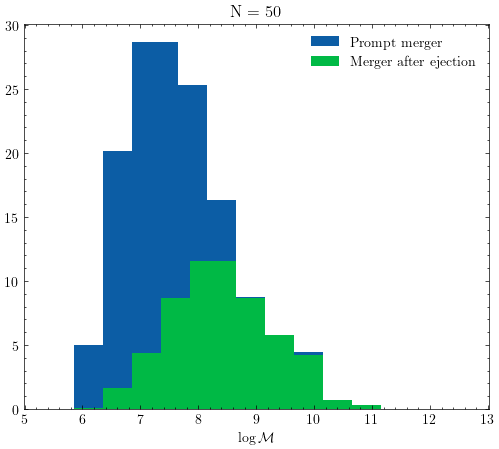

In [242]:
plt.figure(figsize=[6,5])
plt.bar(lgn_Mc_Tr_bins,lg_Mc_Tr/N_trial,label="Prompt merger")
plt.bar(lgn_Mc_Tr_ej_bins,lg_Mc_Tr_ej/N_trial,label="Merger after ejection")
plt.title("N = %d"%(N_trial))
plt.legend()
plt.xlabel("$\log \mathcal{M}$")
plt.savefig("Figures/Mchirp_N%d.pdf"%(N_trial))

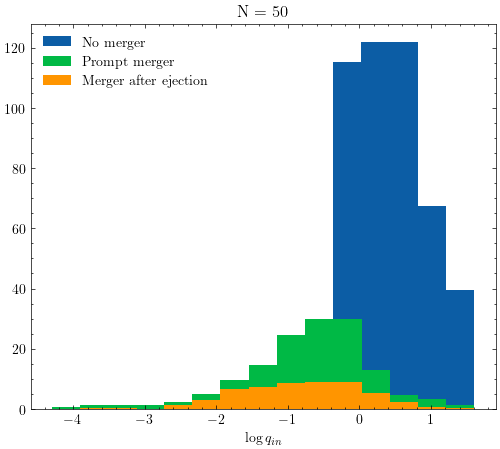

In [238]:
plt.figure(figsize=[6,5])
plt.bar(lgqin_no_bins,lgqin_no/N_trial,label = "No merger")
plt.bar(lgqin_Tr_bins,lgqin_Tr/N_trial,label = "Prompt merger")
plt.bar(lgqin_Tr_ej_bins,lgqin_Tr_ej/N_trial,label = "Merger after ejection")
plt.legend()
plt.xlabel("$\log q_{in}$")
plt.title("N = %d"%(N_trial))
plt.savefig("Figures/qin_N%d.pdf"%(N_trial))

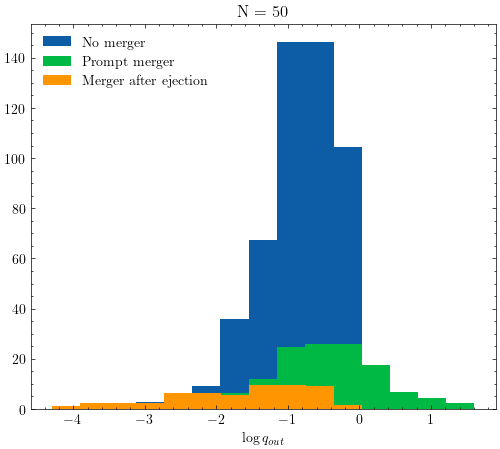

In [239]:
plt.figure(figsize=[6,5])
plt.bar(lgqout_no_bins,lgqout_no/N_trial,label = "No merger")
plt.bar(lgqout_Tr_bins,lgqout_Tr/N_trial,label = "Prompt merger")
plt.bar(lgqout_Tr_ej_bins,lgqout_Tr_ej/N_trial,label = "Merger after ejection")
plt.legend()
plt.xlabel("$\log q_{out}$")
plt.title("N = %d"%(N_trial))
plt.savefig("Figures/qout_N%d.pdf"%(N_trial))

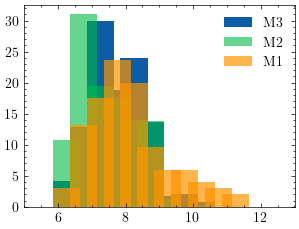

In [129]:
plt.bar(lgm1bins,lgNm3/N_trial,label="M3")
plt.bar(lgm1bins,lgNm2/N_trial,alpha=0.6,label="M2")
plt.bar(lgm1bins,lgNm1/N_trial,alpha=0.7,label="M1")
plt.legend()

In [243]:
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const

boxsize = 75.0
omega_m = 0.2726
omega_l = 0.7274
h = 0.704
vol_comov_box = (boxsize/h)**3 #Mpc^3

In [244]:
def unit_comoving_vol(z):

    D_H = const.c.to('km/s').value/cosmo.H0.value
    return D_H * cosmo.comoving_transverse_distance(z).value**2 * cosmo.inv_efunc(z)

In [394]:
zmax = 4
zbinsize = 0.01

lgzbinsize = 0.2
lgzmin = -3.0
lgzmax = 1.0

merger_rates_Tr = []
merger_rates_Tr_ej = []

dNdlogz_Tr = []
dNdlogz_Tr_ej = []

for i in range(N_trial):
    
    t_n = np.array(Dataset[i][3])
    flag_n = np.array(Dataset[i][4])

    tn_Tr = t_n[np.argwhere(flag_n=='Tr')]
    tn_Tr_ej = t_n[np.argwhere(flag_n=='Tr-ej')]
    
    z_bh_Tr = z_at_value(cosmo.age, (tn_Tr/10**9)*u.Gyr,zmin=1e-9)
    z_bh_Tr = np.array(z_bh_Tr)
    
    z_bh_Tr_ej = z_at_value(cosmo.age, (tn_Tr_ej/10**9)*u.Gyr,zmin=1e-9)
    z_bh_Tr_ej = np.array(z_bh_Tr_ej)
    
    lgz_bh_Tr = np.log10(z_bh_Tr)
    lgz_bh_Tr_ej = np.log10(z_bh_Tr_ej)
    
    
    dVcratio = np.array([unit_comoving_vol(z) 
                                  for z in z_bh_Tr ]) * 4*np.pi/vol_comov_box
    
    Nmrg_zhist,zbin_edges = np.histogram(z_bh_Tr,range=(0,zmax),bins=int(zmax/zbinsize))
    zbins = zbin_edges[:-1]+0.5*zbinsize
    dNmrgdz,tmp = np.histogram(z_bh_Tr,weights=dVcratio,bins=zbin_edges)
    
    dt_zbins = []
    for i in range(zbins.size):
        zatage = cosmo.age(zbins[i]-0.5*zbinsize)-cosmo.age(zbins[i]+0.5*zbinsize)
        dt_zbins.append(float(zatage/u.Gyr))

    dt_zbins = np.array(dt_zbins)
    dNmrg_dzdt = np.array([dNmrgdz[i]/dt_zbins[i]/10**9
                           for i in range(zbins.size)]) ## yr^-1
    
    merger_rate_Tr_n = np.sum(dNmrg_dzdt * zbinsize)
    merger_rates_Tr.append(merger_rate_Tr_n)
    
    Nmrg_lgzhist,lgzbin_edges = np.histogram(lgz_bh_Tr,range=(lgzmin,lgzmax),
                                             bins=int((lgzmax-lgzmin)/lgzbinsize))
    lgzbins = lgzbin_edges[:-1]+0.5*lgzbinsize
    Nmrg_lgzhist = Nmrg_lgzhist.astype('float64')
    
    dNmrgdlogz,tmp = np.histogram(lgz_bh_Tr,weights=dVcratio,
                                                 bins=lgzbin_edges)
    
    dt_lgzbins = []
    
    for i in range(lgzbins.size):
        zatage = cosmo.age(10**(lgzbins[i]-0.5*lgzbinsize))-cosmo.age(10**(lgzbins[i]+0.5*lgzbinsize))
        dt_lgzbins.append(float(zatage/u.Gyr))
        
    dt_lgzbins = np.array(dt_lgzbins)
    dNmrgdlogzdt_allsky_n_Tr = np.array([dNmrgdlogz[i]/(dt_lgzbins[i]*10**9)
                                             for i in range(lgzbins.size)])
    
    dNdlogz_Tr.append(dNmrgdlogzdt_allsky_n_Tr)
    
    dVcratio = np.array([unit_comoving_vol(z) 
                                  for z in z_bh_Tr_ej ]) * 4*np.pi/vol_comov_box
    Nmrg_zhist,zbin_edges = np.histogram(z_bh_Tr_ej,range=(0,zmax),bins=int(zmax/zbinsize))
    zbins = zbin_edges[:-1]+0.5*zbinsize
    dNmrgdz,tmp = np.histogram(z_bh_Tr_ej,weights=dVcratio,bins=zbin_edges)
    
    dt_zbins = []
    for i in range(zbins.size):
        zatage = cosmo.age(zbins[i]-0.5*zbinsize)-cosmo.age(zbins[i]+0.5*zbinsize)
        dt_zbins.append(float(zatage/u.Gyr))

    dt_zbins = np.array(dt_zbins)
    dNmrg_dzdt = np.array([dNmrgdz[i]/dt_zbins[i]/10**9
                           for i in range(zbins.size)]) ## yr^-1
    
    merger_rate_Tr_ej_n = np.sum(dNmrg_dzdt * zbinsize)
    merger_rates_Tr_ej.append(merger_rate_Tr_ej_n)
    
    
    Nmrg_lgzhist,lgzbin_edges = np.histogram(lgz_bh_Tr_ej,range=(lgzmin,lgzmax),
                                             bins=int((lgzmax-lgzmin)/lgzbinsize))
    lgzbins = lgzbin_edges[:-1]+0.5*lgzbinsize
    Nmrg_lgzhist = Nmrg_lgzhist.astype('float64')
    
    dNmrgdlogz,tmp = np.histogram(lgz_bh_Tr_ej,weights=dVcratio,
                                                 bins=lgzbin_edges)
    
    dt_lgzbins = []
    
    for i in range(lgzbins.size):
        zatage = cosmo.age(10**(lgzbins[i]-0.5*lgzbinsize))-cosmo.age(10**(lgzbins[i]+0.5*lgzbinsize))
        dt_lgzbins.append(float(zatage/u.Gyr))
        
    dt_lgzbins = np.array(dt_lgzbins)
    dNmrgdlogzdt_allsky_n_Tr_ej = np.array([dNmrgdlogz[i]/(dt_lgzbins[i]*10**9)
                                             for i in range(lgzbins.size)])
    
    dNdlogz_Tr_ej.append(dNmrgdlogzdt_allsky_n_Tr_ej)

In [395]:
dNdlogz_Tr_mean = []
dNdlogz_Tr_min = []
dNdlogz_Tr_max = []

dNdlogz_Tr = np.array(dNdlogz_Tr)

for i in range(len(lgzbins)):
    dNdlogz_Tr_mean.append(np.mean(dNdlogz_Tr[:,i]))
    dNdlogz_Tr_min.append(np.min(dNdlogz_Tr[:,i]))
    dNdlogz_Tr_max.append(np.max(dNdlogz_Tr[:,i]))
    

In [396]:
dNdlogz_Tr_ej_mean = []
dNdlogz_Tr_ej_min = []
dNdlogz_Tr_ej_max = []

dNdlogz_Tr_ej = np.array(dNdlogz_Tr_ej)

for i in range(len(lgzbins)):
    dNdlogz_Tr_ej_mean.append(np.mean(dNdlogz_Tr_ej[:,i]))
    dNdlogz_Tr_ej_min.append(np.min(dNdlogz_Tr_ej[:,i]))
    dNdlogz_Tr_ej_max.append(np.max(dNdlogz_Tr_ej[:,i]))

In [397]:
lgzbins

array([-2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9,
       -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9])

In [401]:
dNdlogz_Tr_ej_min[np.nonzero(dNdlogz_Tr_ej_min)[0][0]]=0
dNdlogz_Tr_ej_max[np.nonzero(dNdlogz_Tr_ej_max)[0][0]]=0

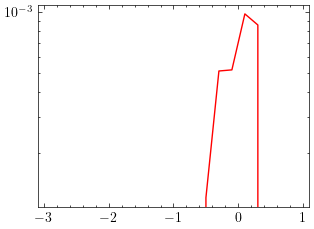

In [402]:
plt.plot(lgzbins,dNdlogz_Tr_ej_min,'r-')
plt.yscale("log")

In [415]:
dNdlogz_Tr_min

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0,
 3.945572053409138e-06,
 0.0,
 3.116834247965695e-05,
 8.903823557181678e-05,
 0.00017864344880898277,
 0.000289394252599186,
 0.0015330513059629795,
 0.0013702715112755728,
 0.0023288388229070873,
 0.0011603930820501148,
 0.0,
 0.0,
 0.0]

In [410]:
dNdlogz_Tr_max[np.nonzero(dNdlogz_Tr_max)[0][0]] = 0

In [417]:
dNdlogz_Tr_min[np.nonzero(dNdlogz_Tr_min)[0][0]]=0

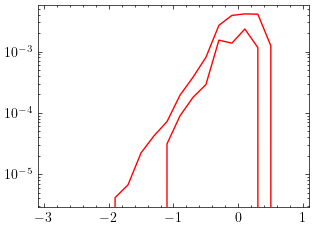

In [420]:
plt.plot(lgzbins,dNdlogz_Tr_max,'r-')
plt.plot(lgzbins,dNdlogz_Tr_min,'r-')
plt.yscale("log")

In [413]:
dNdlogz_Tr_max[np.nonzero(dNdlogz_Tr_max)[0][1]]

6.697255275365377e-06

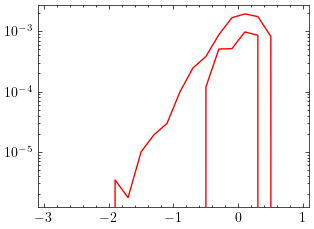

In [421]:
plt.plot(lgzbins,dNdlogz_Tr_ej_max,'r-')
plt.plot(lgzbins,dNdlogz_Tr_ej_min,'r-')
plt.yscale("log")

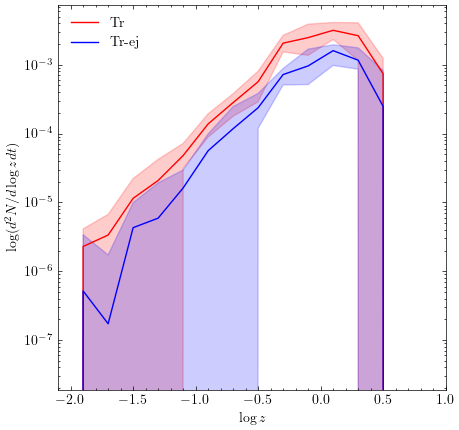

In [434]:
plt.figure(figsize=[5,5])
plt.plot(lgzbins,dNdlogz_Tr_mean,'r-',label="Tr")
plt.fill_between(lgzbins,dNdlogz_Tr_min,dNdlogz_Tr_max,color='r',alpha=0.2)
plt.plot(lgzbins,dNdlogz_Tr_ej_mean,'b-',label="Tr-ej")
plt.fill_between(lgzbins,dNdlogz_Tr_ej_min,dNdlogz_Tr_ej_max,color='b',alpha=0.2)
plt.yscale("log")
plt.xlim(-2.1,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.legend()
#plt.title("N=%d"%(N_trial))
plt.savefig("Figures/Merger_rates_outcomes.pdf")

In [330]:
lgzbins

array([-2.9, -2.7, -2.5, -2.3, -2.1, -1.9, -1.7, -1.5, -1.3, -1.1, -0.9,
       -0.7, -0.5, -0.3, -0.1,  0.1,  0.3,  0.5,  0.7,  0.9])

Text(0, 0.5, '$\\log (d^2 N / d \\log z dt)$')

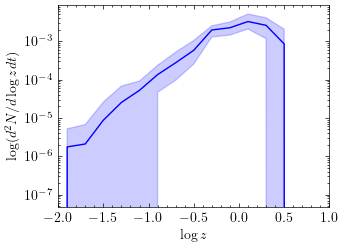

In [331]:

plt.plot(lgzbins,dNdlogz_Tr_mean,'b-')
plt.fill_between(lgzbins,dNdlogz_Tr_min,dNdlogz_Tr_max,color='b',alpha=0.2)
plt.yscale("log")
plt.xlim(-2,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")

In [272]:
dNdlogz_mean = []
dNdlogz_min = []
dNdlogz_max = []

for i in range(len(lgzbins)):
    dNdlogz_mean.append(np.mean(dNdlogz[:,i]))
    dNdlogz_min.append(np.min(dNdlogz[:,i]))
    dNdlogz_max.append(np.max(dNdlogz[:,i]))
    

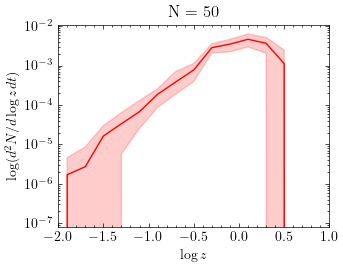

In [312]:
plt.plot(lgzbins,dNdlogz_mean,'r-')
plt.fill_between(lgzbins,dNdlogz_min,dNdlogz_max,color='r',alpha=0.2)
plt.yscale("log")
plt.xlim(-2,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.title("N = %d"%(N_trial))
plt.savefig("Merger_rates_N=50.pdf")

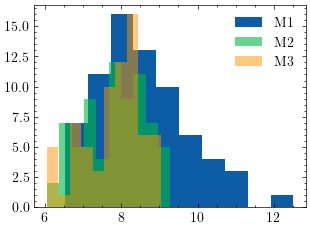

In [308]:
plt.hist(np.log10(M1_n),label="M1")
plt.hist(np.log10(M2_n),alpha=0.6,label="M2")
plt.hist(np.log10(M3_n),alpha=0.5,label="M3")
plt.legend()
plt.show()

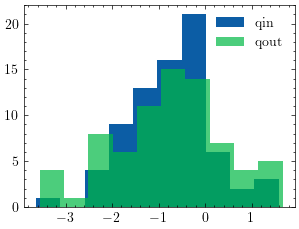

In [275]:
plt.hist(np.log10(M2_n/M1_n),label="qin")
plt.hist(np.log10(M3_n/M1_n),alpha=0.7,label="qout")
plt.legend()

In [309]:
triples_df1 = pd.DataFrame(list(zip(M1m,M2m,M3m,z_value,mflags)),
               columns =['Mass 1', 'Mass 2','Mass 3','Redshift','Flag'])

In [310]:
triples_df1

,Mass 1,Mass 2,Mass 3,Redshift,Flag
0,2.150737e+07,8.204738e+06,5.276829e+07,2.447173,Tr-ej
1,1.546540e+08,4.211761e+07,3.132749e+08,0.446075,Tr-ej
2,1.837358e+08,7.257406e+07,4.653945e+07,2.918619,Tr
3,8.736168e+07,2.386990e+07,2.216544e+06,1.172628,Tr-ej
4,9.436961e+06,1.002870e+06,4.551391e+08,0.802440,Tr
...,...,...,...,...,...
169,3.413669e+09,9.602931e+07,7.862979e+08,0.119849,Tr
170,5.740772e+06,1.812417e+07,3.295528e+06,0.118485,Tr-ej
171,7.888591e+06,6.336699e+06,1.219777e+07,0.150099,Tr
172,3.821091e+10,6.044300e+08,1.062155e+07,0.103086,Tr


In [114]:
df1 = triples_df[triples_df['Flag']=='Tr']
df2 = triples_df[triples_df['Flag']=='Tr-ej']

Text(0.5, 0, '$\\log \\mathcal{M}$')

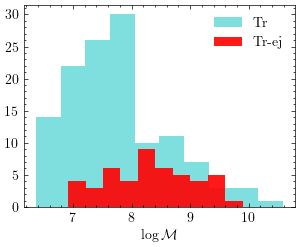

In [115]:
m11 = df1["Mass 1"].to_numpy()
m12 = df1["Mass 2"].to_numpy()

m21 = df2["Mass 1"].to_numpy()
m22 = df2["Mass 2"].to_numpy()

mchirp1 = (m11 * m12)**(3/5)/(m11 + m12)**(1/5)
binn1=plt.hist(np.log10(mchirp1),color="c",alpha=0.5,label="Tr")

mchirp2 = (m21 * m22)**(3/5)/(m21 + m22)**(1/5)
binn2=plt.hist(np.log10(mchirp2),color="r",alpha=0.9,label="Tr-ej")

plt.legend()
plt.xlabel("$\log \mathcal{M}$")
#plt.savefig("Figures/histogram-1.pdf")

Text(0.5, 0, '$\\log q_{in}$')

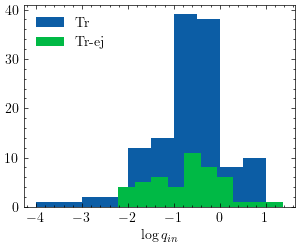

In [116]:
plt.hist(np.log10(m12/m11),label="Tr")
plt.hist(np.log10(m22/m21),label="Tr-ej")
plt.legend()
plt.xlabel("$\log q_{in}$")
#plt.savefig("Figures/qin-histogram.pdf")

Text(0.5, 0, '$\\log q_{out}$')

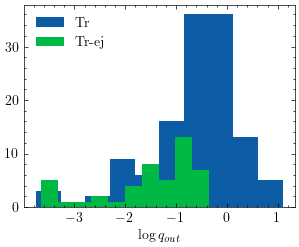

In [117]:
m13 = df1["Mass 3"].to_numpy()
m23 = df2["Mass 3"].to_numpy()

plt.hist(np.log10(m13/(m11+m12)),label="Tr")
plt.hist(np.log10(m23/(m21+m22)),label="Tr-ej")
plt.legend()
plt.xlabel("$\log q_{out}$")
#plt.savefig("Figures/qout-histogram.pdf")

## Redshift and Merger Rates

In [118]:
z_Tr = df1["Redshift"].to_numpy()
z_Tr_ej = df2["Redshift"].to_numpy()

In [121]:
dVcratio_Tr = np.array([unit_comoving_vol(z) 
                                  for z in z_Tr ]) * 4*np.pi/vol_comov_box

In [128]:
lgzbin_Tr,rate_Tr = merger_rate_log_plot(z_Tr)
lgzbin_Tr_ej,rate_Tr_ej = merger_rate_log_plot(z_Tr_ej)
lgzbin_zill,rate_zill = merger_rate_log_plot(z_ill)

total merger rate (yr^-1):  0.007061366498179457
total merger rate (yr^-1):  0.002621085301564857
total merger rate (yr^-1):  0.03470882382862961


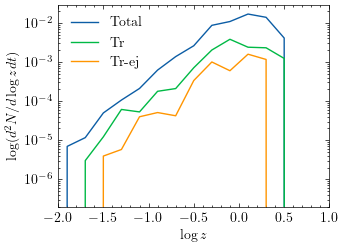

In [134]:
plt.style.use("science")
#plt.figure(figsize=[7,5])
plt.plot(lgzbin_zill,rate_zill,label="Total")
plt.plot(lgzbin_Tr,rate_Tr,label="Tr")
plt.plot(lgzbin_Tr_ej,rate_Tr_ej,label="Tr-ej")
plt.yscale("log")
plt.xlim(-2,1)
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.legend()
plt.savefig("Figures/Tr_n_Tr-ej_merger_rate.pdf")